Création des tableaux de features et de targets à partir du dossier contenant les images

In [72]:
#Dataset

import glob #Permet de lister toute les images dans notre dossier
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt 
import os 
import random 

targets = [] #Liste stockant l'information qui nous dit si cette image est chien ou un chat
features = [] #Liste contenant les images
i = 0
files = glob.glob("train/*.jpg")

random.shuffle(files) #On mélange files pour ne pas avoir les images de chats en premier et les images de chiens ensuite

for file in files[:12000]:
  print(i)
  features.append(np.array(Image.open(file).resize((75, 75)))) #On ajoute l'image dans le tableau de features
  target = 1 if "cat" in file else 0 #on indique la valeur de la target si l'image est un chat (1) ou chien (0)
  targets.append(target)#on ajoute la target de l'image a notre tableau de target
  i = i+1

features = np.array(features)#Conversion de nos listes en tableaux
targets = np.array(targets)

print("Shape of features : ", features.shape) #(nombre d'image, la taille, le nombre de couleur)
print("Shape of targets : ", targets.shape) #(nombre d'image)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

On affiche les 10 premières images

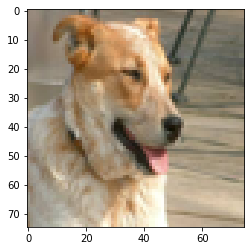

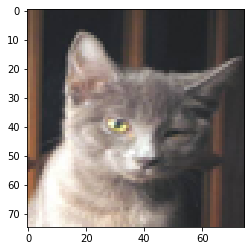

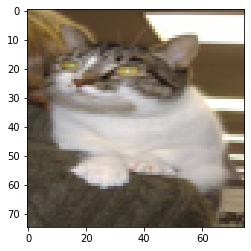

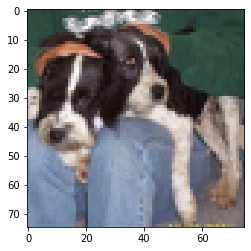

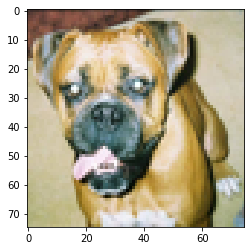

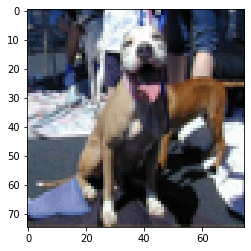

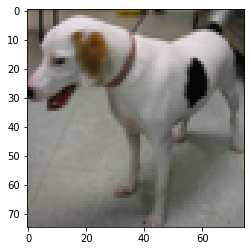

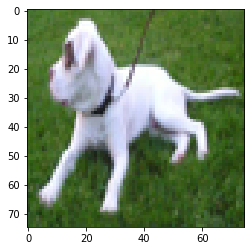

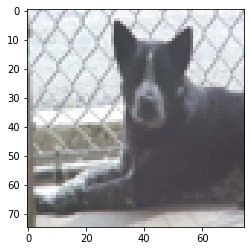

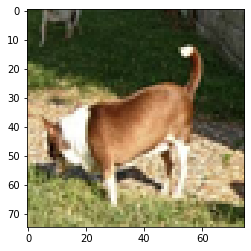

In [193]:
#Visualisation des images

for a in range(10):
  plt.imshow(features[a])
  plt.show()

Création des données de train et de test à partir du train_test_split de Scikit-Learn

In [73]:
#Entrainement
import tensorflow as tf
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=1/6, random_state=42) #x = features, y = targets 

print("Shape of x_train : ", x_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)


Shape of x_train :  (10000, 75, 75, 3)
Shape of x_test :  (2000, 75, 75, 3)
Shape of y_train :  (10000,)
Shape of y_test :  (2000,)


Normalisation des images

In [74]:
x_train = x_train / 255
x_test = x_test / 255

Création du modèle

In [75]:
#Modèle

import tensorflow as tf 
from tensorflow.keras import layers


model = tf.keras.Sequential()
model.add(layers.InputLayer(input_shape=(75, 75, 3)))
model.add(layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.25))

model.add((layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu')))
model.add((layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu')))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(200, activation = 'relu'))
#model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(50, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation = 'softmax'))

model.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 73, 73, 32)        896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 35, 35, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 33, 33, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 31, 31, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 64)       

Compilation du modèle

In [76]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Entrainement du modèle

In [77]:
model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

Train on 10000 samples, validate on 2000 samples
Epoch 1/2
10000/10000 [==============================] - 100s 10ms/sample - loss: 0.6919 - accuracy: 0.5334 - val_loss: 0.8256 - val_accuracy: 0.4990
Epoch 2/2
10000/10000 [==============================] - 97s 10ms/sample - loss: 0.6505 - accuracy: 0.6388 - val_loss: 0.6312 - val_accuracy: 0.6570


Prédiction sur n valeurs

In [78]:
preds = model.predict_classes(x_test[:10])

Comparaison des prédictions avec les vraies valeurs

In [80]:
count = 0
for i in range(preds.size):
    if preds[i] == y_test[i]:
        count += 1
    
count = count *100/preds.size
count

print(preds)
print(y_test[:10])

[0 0 0 0 0 1 0 0 1 0]
[0 0 1 1 0 1 0 1 1 1]


Fonction permettant de créer un fichier **.h** pour la version Micro. Création d'un tableau d'entiers 2D avec le nombre d'images à tester et le nombre de pixels par image et d'un tableau 1D contenant les labels.

In [135]:
def write_test_data_header(file_name, x, y, n_values):
  """
  Function to write a c header file containing a set of test input and output
  data for this classification model
  :param file_name: name of the header file to create
  :param x: input data numpy array
  :param y: output data numpy array, first dimension much match above
  :return: Nothing
  """

  with open(file_name, "w") as header:
    header.write("// MNIST test data\n\n")

    header.write("int mnistSampleCount = %d;\n\n" % n_values)

    header.write("float mnistInput[%d][16875] = {\n" % n_values)
    for i in range(n_values):
      if i != 0:
        header.write(",\n")
      header.write("{ ")
      row = x[i].reshape(1, x[0].size).astype(np.int)
      np.savetxt(header, row, delimiter=', ', newline='', fmt='%d')
      header.write(" }")
    header.write("};\n\n")

    header.write("int mnistOutput[%d] = { " % n_values)
    np.savetxt(header,
               y[0:n_values].reshape(1, n_values),
               delimiter=', ',
               newline='',
               fmt='%d')
    header.write(" };\n")

write_test_data_header("cvsd_test_data.h", x_test, y_test, 10)

Conversion du modèle en TF Lite puis en TF Lite Micro

In [82]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("cats_vs_dogs_model_demo.tflite", "wb").write(tflite_model)


#!xxd -i cats_vs_dogs_model_demo.tflite > cats_vs_dogs_model_demo.cc

11827220

Test du modèle TF Lite et comparaison avec le modèle original

In [85]:
# Instantiate an interpreter for each model
cvsd_model = tf.lite.Interpreter('cats_vs_dogs_model_demo.tflite')
cvsd_model_quantized = tf.lite.Interpreter('cats_vs_dogs_model_quantized_demo.tflite')
# Allocate memory for each model
cvsd_model.allocate_tensors()
cvsd_model_quantized.allocate_tensors()

#Compute accuracy for converted models
def evaluate_model(interpreter):

    # Create arrays to store the results
    cvsd_model_predictions = []

    # Run each model's interpreter for each value and store the results in arrays
    for i in x_test:
        #print(interpreter.get_input_details())
        input_details = interpreter.get_input_details()
        i = np.expand_dims(i, axis= 0).astype(np.float32)
        interpreter.set_tensor(input_details[0]['index'], i)
        interpreter.invoke()
        output_details = interpreter.get_output_details()
        output_data = interpreter.get_tensor(output_details[0]['index'])
        cvsd_model_predictions.append(np.argmax(output_data))

    count = 0
    for j in range(len(cvsd_model_predictions)):
        if cvsd_model_predictions[j] == y_test[j]:
            count+=1
    count = 100 * count / len(cvsd_model_predictions)
    return count


print("TFLite model accuracy: {:.2f}%".format(evaluate_model(cvsd_model)))
print("TFLite model accuracy: {:.2f}%".format(evaluate_model(cvsd_model_quantized)))

TFLite model accuracy: 65.70%
TFLite model accuracy: 65.75%


In [84]:
# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

# Save the model to disk
open("cats_vs_dogs_model_quantized_demo.tflite", "wb").write(tflite_model)

2963800